In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling2D

tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
# Data Processing
# This file has 9000 samples per class and 2 classes (Signal, Background)

dataset = "ZTraining_9000.csv"
categories = ["Background", "Signal"]
samples_class = 9000

In [3]:
# Loading data
print("\n Loading data from database file...")
features = np.loadtxt(dataset, delimiter = ',', skiprows=1,
                            usecols = (0,1,2,3,4,5,6,7), unpack=True) #.astype(np.float32)
labels = np.loadtxt(dataset, delimiter = ',', skiprows=1, dtype = 'str', 
                            usecols = (8), unpack=True)


 Loading data from database file...


In [4]:
class_num = np.array(labels)
features = features.T

In [5]:
print("\n Generating training and test data...")
x_train = np.concatenate((
            features[:(samples_class-1800)],
            features[samples_class:(2*samples_class-1800)]),
            axis=0)
x_test = np.concatenate((
            features[(samples_class-1800):samples_class],
            features[(2*samples_class-1800):2*samples_class]),
            axis=0)

y_train = np.concatenate((
            class_num[:(samples_class-1800)],
            class_num[samples_class:(2*samples_class-1800)]),
            axis=0)
y_test = np.concatenate((
            class_num[(samples_class-1800):samples_class],
            class_num[(2*samples_class-1800):2*samples_class]),
            axis=0)

print("\n Total samples:    {} ".format(len(labels)))
print("\n Training samples: {} ".format(len(y_train)))
print("\n Test samples:     {} ".format(len(y_test)))


 Generating training and test data...

 Total samples:    18000 

 Training samples: 14400 

 Test samples:     3600 


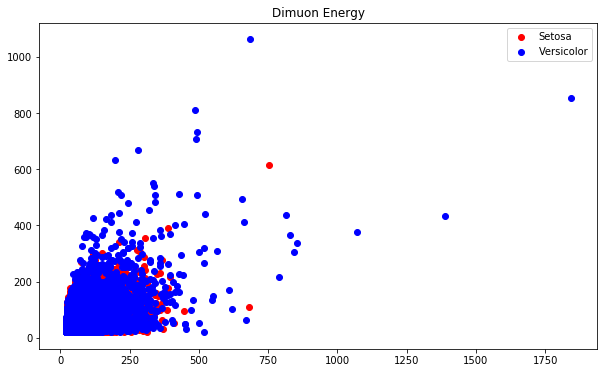

In [6]:
# Sepal length and width
plt.figure(figsize=(10,6))
plt.scatter(features[:9000,0],features[0:9000,4], color='red',label='Setosa')
plt.scatter(features[9001:18000,0],features[9001:18000,4], 
                color='blue', label='Versicolor')

plt.title('Dimuon Energy')
plt.legend(loc='best')
plt.show()

In [7]:
# Suffle data inside training_data so that it is not in the same loading order
random.shuffle(x_train)
random.shuffle(y_train)
random.shuffle(x_test)
random.shuffle(y_test)

In [8]:
#===============================================================================
#======================== Model Building =======================================
#===============================================================================
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

epochs = 20
num_features = 8
num_classes = 2
batch_size = 32

In [9]:
# Build model
print("\n Building model...")
model = Sequential()
model.add(Dense(128, input_shape=(8,), activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes,activation=tf.nn.softmax))

print("\n Compiling model...")
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

print("\n Fitting model...")
history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (x_test, y_test))


 Building model...

 Compiling model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 17,922
Trainable params: 17,922
Non-trainable params: 0
_________________________________________________________________
None

 Fitting model...
Train on 14400 samples, validate on 3600 samples
Epoch 1/20
14400/14400 [==============================] - 2s 136us/sample - loss: 0.6945 - acc: 0.5049 - val_loss: 0.6939 - val_acc: 0.4978
Epoch 2/20
14400/14400 [==============================] - 1s 89us/sample - loss: 0.6934 - acc: 0.5003 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 3/2

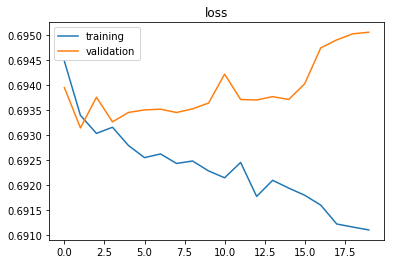

In [10]:
#plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'], label='training')
plt.plot(history.epoch,history.history['val_loss'], label='validation')
plt.title('loss')
plt.legend(loc='best')
plt.show()

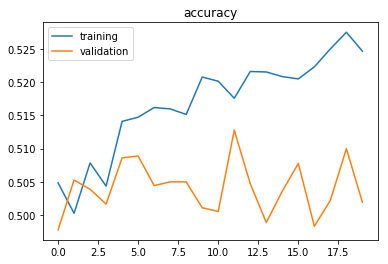

In [11]:
#plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'], label='training')
plt.plot(history.epoch,history.history['val_acc'], label='validation')
plt.title('accuracy')
plt.legend(loc='best')
plt.show()

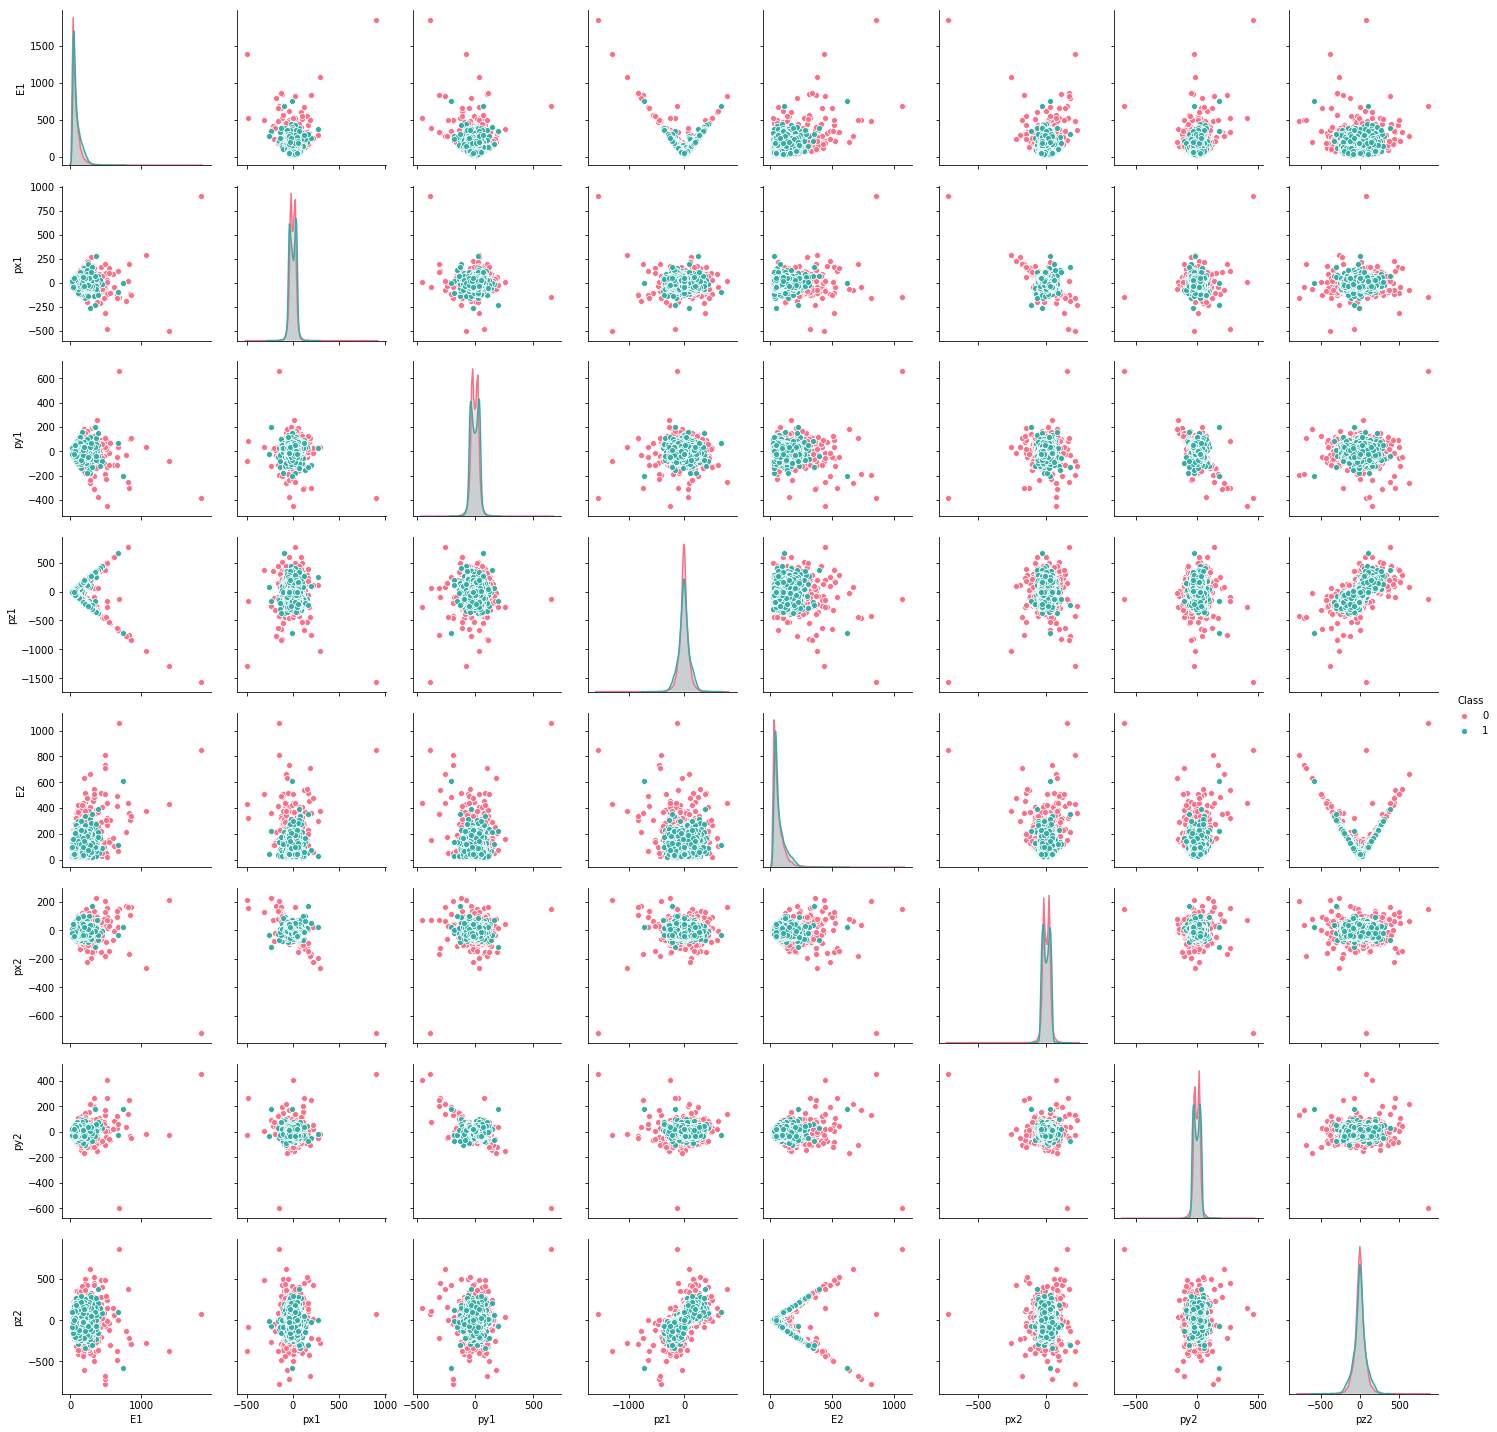

In [12]:
import seaborn as sns
Dataset = pd.read_csv('ZTraining_9000.csv')
sns_plot = sns.pairplot(Dataset, hue = 'Class', palette="husl", vars=['E1','px1','py1','pz1',
                                                                      'E2','px2','py2','pz2'])
sns_plot.savefig("4-Momenta.png")